# 1 - Análise de Dados com  Pandas

In [241]:
import pandas as pd # Importando a biblioteca Pandas

In [242]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv") # Carregando o arquivo CSV em um DataFrame do Pandas

In [243]:
df.head() # Visualizar amostra dos dados

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [244]:
df.info() # Fornecer um resumo conciso do DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [245]:
df.describe() # Obtendo algumas estatísticas

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [246]:
df.shape # Mostrar a dimensão do arquivos: (linhas,colunas)

(133349, 11)

In [247]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas", linhas)
print("colunas", colunas)

linhas 133349
colunas 11


In [248]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Colocando os nomes das colunas em português

In [249]:

 #Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


## Analisando quais são as categorias das colunas categóricas

**Nível de senioridade**

In [250]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df["senioridade"].value_counts()


senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

| Sigla | Significado | Descrição |
|------|-------------|-----------|
| SE | Senior | Profissional experiente (nível sênior) |
| MI | Mid | Nível intermediário |
| EN | Entry | Iniciante ou júnior |
| EX | Executive | Executivo, liderança sênior |

**Tipo de contrato**

In [251]:
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64


| Sigla | Significado | Descrição |
|------|------------|-----------|
| FT | Full-time | Tempo integral – trabalho padrão de 40h/semana ou período completo |
| PT | Part-time | Meio período – carga horária reduzida |
| CT | Contract | Contrato temporário ou por projeto – geralmente por prazo determinado |
| FL | Freelance | Freelancer – trabalho autônomo ou por demanda, sem vínculo formal |


**Regime de trabalho**

In [252]:
df["remoto"].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64



| Sigla | Significado | Descrição |
|-------|-------------|-----------|
| **0** | Presencial | Trabalho realizado integralmente no escritório ou local definido pela empresa |
| **50** | Híbrido | Combinação entre trabalho presencial e remoto |
| **100** | Remoto | Trabalho realizado integralmente de forma remota |


**Tamanho da empresa**

In [253]:
df["tamanho_empresa"].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

| Sigla | Significado | Descrição |
|-------|-------------|-----------|
| **S** | Pequena     | Empresa de tamanho pequeno |
| **M** | Média       | Empresa de tamanho médio |
| **L** | Grande      | Empresa de tamanho grande |

## Modificando o nome das categorias

In [254]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

senioridade
senior       77241
pleno        40465
junior       12443
executivo     3200
Name: count, dtype: int64

In [255]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

contrato
integral      132563
contrato         394
parcial          376
freelancer        16
Name: count, dtype: int64

In [256]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

tamanho_empresa
media      129561
grande       3574
pequena       214
Name: count, dtype: int64

In [257]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

remoto
presencial    105312
remoto         27718
hibrido          319
Name: count, dtype: int64

In [258]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Podemos também resumir as informações categóricas com o método describe(), exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [259]:
df.describe(include='object') # Qualitativas

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [260]:
df.describe() # Quantitativas

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


**Com isso já conseguimos responder algumas perguntas, como:**

Qual o nível de experiência mais comum na base de dados?


* Qual é o tipo de contrato mais frequente?
* Qual o cargo mais frequente na amostra?
* De qual país são a maioria dos profissionais da base?
* Qual é o país onde mais empresas da amostra estão sediadas?
* Qual o regime de trabalho mais comum?
* Qual é o tamanho mais comum das empresas na amostra?

**O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.**

# 2 - Preparação e Limpeza dos Dados

In [261]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [262]:
df.isnull().sum() # Verificar valores faltantes

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [263]:
df["ano"].unique() # Checando quais anos existem no DataFrame

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [264]:
df[df.isnull().any(axis=1)] # Linhas da base cujo ano está nulo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


O que fazer quando a nossa base possui valores faltantes/nulos/ausentes?

In [265]:
# 1. Preenchimento com Valores Derivados (Imputation)
# Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

# 2. Remover Linhas com Dados Faltantes
# Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

# 3. Inferência e Preenchimento com Regras de Negócio
# Preencher com base em regras claras.


| Estratégia | Quando usar |
|----------|-------------|
| Imputação inteligente | Quando os dados faltantes são significativos |
| Remoção de linhas | Quando o volume de nulos é pequeno |
| Preenchimento baseado em regra | Quando há lógica de negócio clara |


##  Exemplos fictícios

**Exemplo de preenchimento com média e mediana, exemplo com salários**

In [266]:
import numpy as np # Usando a biblioteca numpy

df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'salario': [4000, np.nan, 3500, np.nan, 5000]
})

# Preencher com a média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preencher com a mediana salarial - Em alguns casos, especialmente para variáveis como salário, é preferível preencher valores faltantes com a mediana em vez da média, pois a média pode ser fortemente influenciada por valores discrepantes (outliers).
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,4166.67,4000.0
2,Carlos,3500.0,3500.00,3500.0
3,Diana,NaN,4166.67,4000.0
4,Eduardo,5000.0,5000.00,5000.0


**Exemplo de preenchimento com o valor anterior, exemplo com temperatura**

In [267]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


**Exemplo de preenchimento com o valor posterior, exemplo com temperatura**

In [268]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


**Exemplo de preenchimento com valor fixo, exemplo cidade**

In [269]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


## Tratando o nosso DataFrame

Removendo os dados nulos

In [270]:
df_limpo = df.dropna() # Remoção das linhas com anos nulos, armazenando no novo DataFrame

In [271]:
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [272]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [273]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


A variável ano tá como float, vamos converter para inteiro

In [274]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))

In [275]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Salvando um arquivo após ter sido limpo e preparado para análises posteriores:

In [276]:
# df_limpo.to_csv('dados-imersao.csv', index=False)


# 3 - Visualização de Dados

Criando gráficos estatísticos para explorar e comunicar informações presentes nos dados. Histogramas, boxplots, barras, etc.

In [277]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

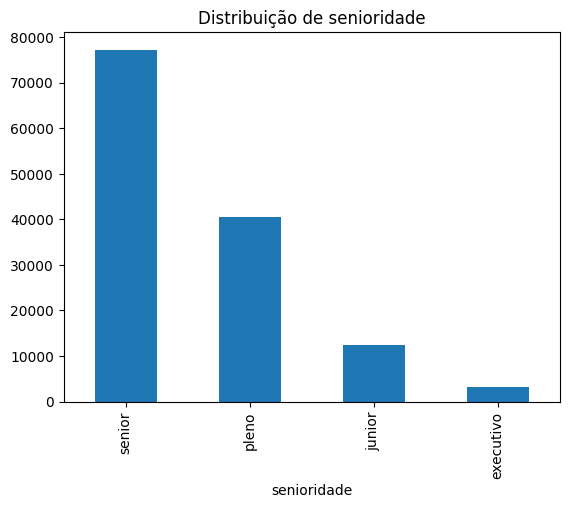

In [278]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title="Distribuição de senioridade")

In [279]:
import seaborn as sns # Carregando biblioteca Seaborn, vamos melhorar nossos gráficos

<Axes: xlabel='senioridade', ylabel='usd'>

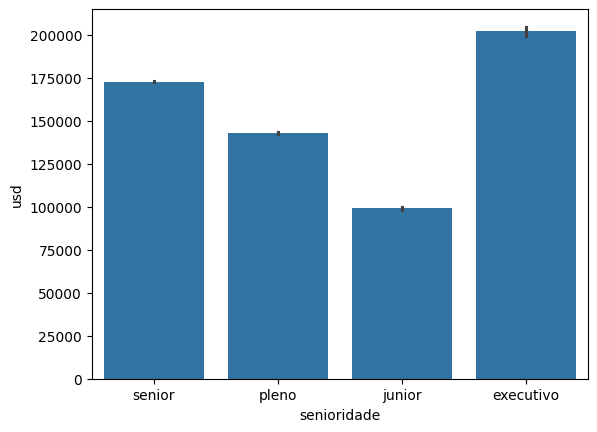

In [280]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [281]:
import matplotlib.pyplot as plt # Outra biblioteca muito importante, Matplotlib

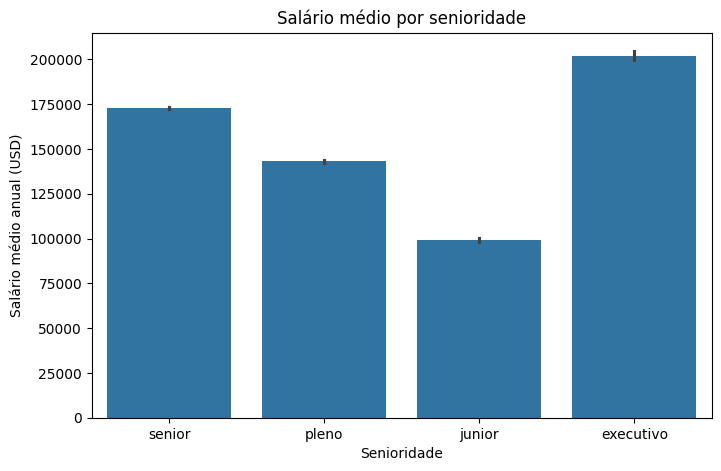

In [282]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()


In [283]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
executivo    202027.667813
senior       172850.838301
pleno        143044.845979
junior        99034.963267
Name: usd, dtype: float64

In [284]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index # Armazenando na variável ordem, vai ficar do menor para o maior porque o ascending=True, o contrário é False

In [285]:
ordem

Index(['junior', 'pleno', 'senior', 'executivo'], dtype='object', name='senioridade')

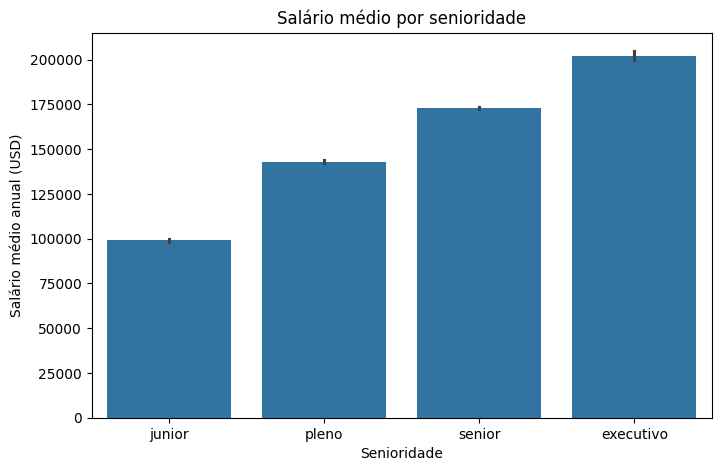

In [286]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem) # Adicionando o parâmetro ordem
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

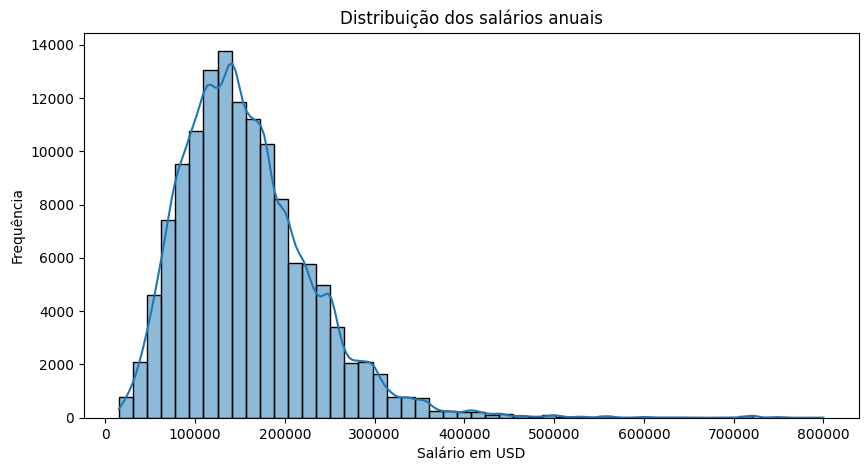

In [287]:
# Vamos visualizar a distribuição dos salários, através do histrograma
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

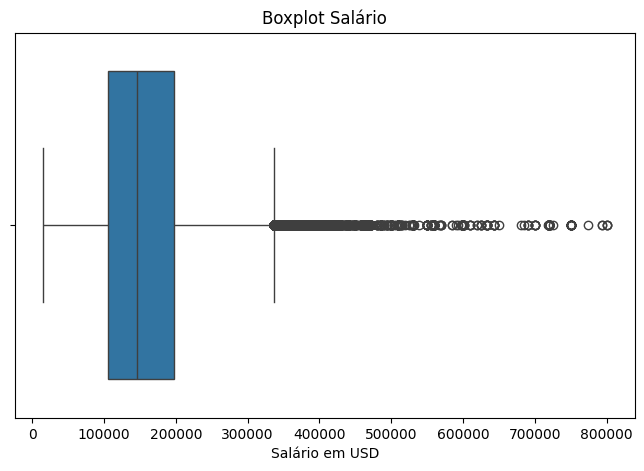

In [288]:
# Vamos visualizar a distribuição dos salários, através do Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salário em USD")
plt.show()

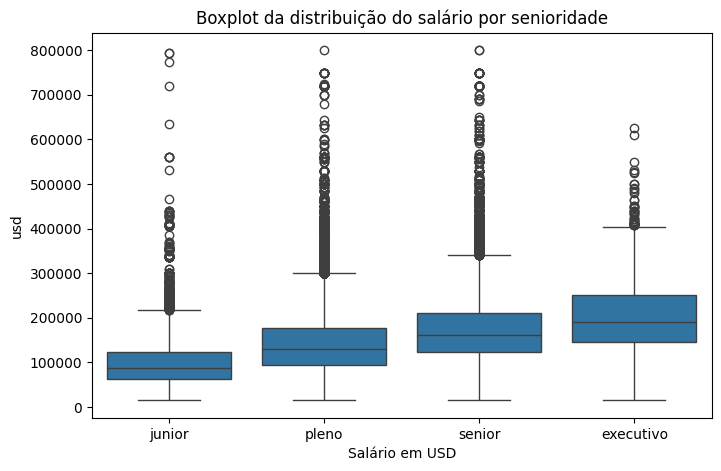

In [289]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição do salário por senioridade")
plt.xlabel("Salário em USD")
plt.show()

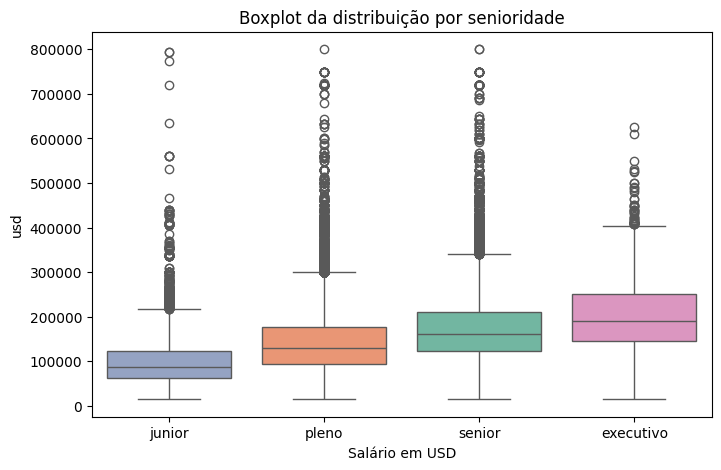

In [290]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()


## Gráficos interativos

In [291]:
import plotly.express as px # Vamos criar gráficos interativos, com essa biblioteca

In [292]:
df_salario_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Definir a ordem das senioridades para o gráfico
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
df_salario_senioridade['senioridade'] = pd.Categorical(df_salario_senioridade['senioridade'], categories=ordem_senioridade, ordered=True)
df_salario_senioridade = df_salario_senioridade.sort_values('senioridade')

fig = px.bar(
    df_salario_senioridade,
    x='senioridade',
    y='usd',
    title='Salário Médio Anual por Nível de Senioridade (USD)',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio Anual (USD)'},
    color='senioridade', # Adiciona cores diferentes para cada barra
    color_discrete_sequence=px.colors.qualitative.Plotly # Escolhe uma paleta de cores
)

fig.update_layout(xaxis_title='Nível de Senioridade', yaxis_title='Salário Médio Anual (USD)')
fig.show()

In [293]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()


In [294]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()


In [295]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [296]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [297]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()


In [298]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media,USA
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media,USA
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media,AUS
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media,AUS
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media,USA


In [299]:
df_limpo.to_csv('dados-imersao-final.csv', index=False) # Base limpa

# 4 - Construindo um Dashboard com Streamlit

Aprender a usar a biblioteca Streamlit para a criação de um dashboard
interativo simples, que permite visualizar dados filtrados e gerar gráficos de forma prática.



1.   Criar o ambiente virtual:
python3 -m venv .venv
2.   Ativar o ambiente virtual em Windows:
.venv\Scripts\Activate
3. Ativar o ambiente virtual em MAC/LINUX:
source .venv/bin/activate
4. Criar um arquivo chamado requirements.txt e adicionar os pacotes necessários

pandas==2.2.3

streamlit==1.44.1

plotly==5.24.1

5. Instalar as bibliotecas necessárias

pip install -r requirements.txt

6. Criar a Interface do Dashboard com Streamlit
7. Realizar o deploy do Dashboard no Streamlit Cloud: https://streamlit.io/cloud






In [300]:
# import streamlit as st
# import pandas as pd
# import plotly.express as px

# # Install streamlit if not already installed
# try:
#     import streamlit
# except ImportError:
#     !pip install streamlit
#     import streamlit as st

# # --- Configuração da Página ---
# # Define o título da página, o ícone e o layout para ocupar a largura inteira.
# st.set_page_config(
#     page_title="Dashboard de Salários na Área de Dados",
#     page_icon="📊",
#     layout="wide",
# )

# # --- Carregamento dos dados ---
# df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

# # --- Barra Lateral (Filtros) ---
# st.sidebar.header("🔍 Filtros")

# # Filtro de Ano
# anos_disponiveis = sorted(df['ano'].unique())
# anos_selecionados = st.sidebar.multiselect("Ano", anos_disponiveis, default=anos_disponiveis)

# # Filtro de Senioridade
# senioridades_disponiveis = sorted(df['senioridade'].unique())
# senioridades_selecionadas = st.sidebar.multiselect("Senioridade", senioridades_disponiveis, default=senioridades_disponiveis)

# # Filtro por Tipo de Contrato
# contratos_disponiveis = sorted(df['contrato'].unique())
# contratos_selecionados = st.sidebar.multiselect("Tipo de Contrato", contratos_disponiveis, default=contratos_disponiveis)

# # Filtro por Tamanho da Empresa
# tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
# tamanhos_selecionados = st.sidebar.multiselect("Tamanho da Empresa", tamanhos_disponiveis, default=tamanhos_disponiveis)

# # --- Filtragem do DataFrame ---
# # O dataframe principal é filtrado com base nas seleções feitas na barra lateral.
# df_filtrado = df[
#     (df['ano'].isin(anos_selecionados)) &
#     (df['senioridade'].isin(senioridades_selecionadas)) &
#     (df['contrato'].isin(contratos_selecionados)) &
#     (df['tamanho_empresa'].isin(tamanhos_selecionados))
# ]

# # --- Conteúdo Principal ---
# st.title("🎲 Dashboard de Análise de Salários na Área de Dados")
# st.markdown("Explore os dados salariais na área de dados nos últimos anos. Utilize os filtros à esquerda para refinar sua análise.")

# # --- Métricas Principais (KPIs) ---
# st.subheader("Métricas gerais (Salário anual em USD)")

# if not df_filtrado.empty:
#     salario_medio = df_filtrado['usd'].mean()
#     salario_maximo = df_filtrado['usd'].max()
#     total_registros = df_filtrado.shape[0]
#     cargo_mais_frequente = df_filtrado["cargo"].mode()[0]
# else:
#     salario_medio, salario_maximo, total_registros, cargo_mais_frequente = 0, 0, 0, ""

# col1, col2, col3, col4 = st.columns(4)
# col1.metric("Salário médio", f"${salario_medio:,.0f}")
# col2.metric("Salário máximo", f"${salario_maximo:,.0f}")
# col3.metric("Total de registros", f"{total_registros:,}")
# col4.metric("Cargo mais frequente", cargo_mais_frequente)

# st.markdown("---")

# # --- Análises Visuais com Plotly ---
# st.subheader("Gráficos")

# col_graf1, col_graf2 = st.columns(2)

# with col_graf1:
#     if not df_filtrado.empty:
#         top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
#         grafico_cargos = px.bar(
#             top_cargos,
#             x='usd',
#             y='cargo',
#             orientation='h',
#             title="Top 10 cargos por salário médio",
#             labels={'usd': 'Média salarial anual (USD)', 'cargo': ''}
#         )
#         grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
#         st.plotly_chart(grafico_cargos, use_container_width=True)
#     else:
#         st.warning("Nenhum dado para exibir no gráfico de cargos.")

# with col_graf2:
#     if not df_filtrado.empty:
#         grafico_hist = px.histogram(
#             df_filtrado,
#             x='usd',
#             nbins=30,
#             title="Distribuição de salários anuais",
#             labels={'usd': 'Faixa salarial (USD)', 'count': ''}
#         )
#         grafico_hist.update_layout(title_x=0.1)
#         st.plotly_chart(grafico_hist, use_container_width=True)
#     else:
#         st.warning("Nenhum dado para exibir no gráfico de distribuição.")

# col_graf3, col_graf4 = st.columns(2)

# with col_graf3:
#     if not df_filtrado.empty:
#         remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
#         remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
#         grafico_remoto = px.pie(
#             remoto_contagem,
#             names='tipo_trabalho',
#             values='quantidade',
#             title='Proporção dos tipos de trabalho',
#             hole=0.5
#         )
#         grafico_remoto.update_traces(textinfo='percent+label')
#         grafico_remoto.update_layout(title_x=0.1)
#         st.plotly_chart(grafico_remoto, use_container_width=True)
#     else:
#         st.warning("Nenhum dado para exibir no gráfico dos tipos de trabalho.")

# with col_graf4:
#     if not df_filtrado.empty:
#         df_ds = df_filtrado[df_filtrado['cargo'] == 'Data Scientist']
#         media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()
#         grafico_paises = px.choropleth(media_ds_pais,
#             locations='residencia_iso3',
#             color='usd',
#             color_continuous_scale='rdylgn',
#             title='Salário médio de Cientista de Dados por país',
#             labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})
#         grafico_paises.update_layout(title_x=0.1)
#         st.plotly_chart(grafico_paises, use_container_width=True)
#     else:
#         st.warning("Nenhum dado para exibir no gráfico de países.")

# # --- Tabela de Dados Detalhados ---
# st.subheader("Dados Detalhados")
# st.dataframe(df_filtrado)


## Observação
O dashboard final foi desenvolvido em Streamlit e está disponível no arquivo app.py.
Este notebook contém a análise exploratória e os passos de aprendizado.
